In [2]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('HCMST_ver_3.04.csv')

In [6]:
df_features = data[['ppagecat', 'ppeducat', 'ppgender', 'ppincimp', 'children_in_hh', 'qflag', 'glbstatus', 'married', 'q24_met_online']] 
df_features.shape

(4002, 9)

In [7]:
df_features = df_features.dropna()
df_features.shape

(2934, 9)

In [8]:
data_array = df_features.to_numpy()

In [11]:
categorical_columns = [0, 1, 2, 3, 5, 6, 7, 8]  # вік, освіта, стать, партнер, лгбт, одружений, зустрілися онлайн

In [10]:
df_features.head()

,ppagecat,ppeducat,ppgender,ppincimp,children_in_hh,qflag,glbstatus,married,q24_met_online
0,4,4,2,7,0,1,1,0,1.0
1,2,4,2,11,0,1,1,1,0.0
3,2,3,1,11,0,1,1,0,1.0
6,4,4,1,17,0,1,1,0,0.0
7,5,4,1,6,0,1,1,1,0.0


In [12]:
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)
clusters = kproto.fit_predict(data_array, categorical=categorical_columns)

# Додаємо кластери до таблиці
df_features['Cluster'] = clusters

print(df_features.head())

   ppagecat  ppeducat  ppgender  ppincimp  children_in_hh  qflag  glbstatus  \
0         4         4         2         7               0      1          1   
1         2         4         2        11               0      1          1   
3         2         3         1        11               0      1          1   
6         4         4         1        17               0      1          1   
7         5         4         1         6               0      1          1   

   married  q24_met_online  Cluster  
0        0             1.0        0  
1        1             0.0        2  
3        0             1.0        2  
6        0             0.0        0  
7        1             0.0        0  


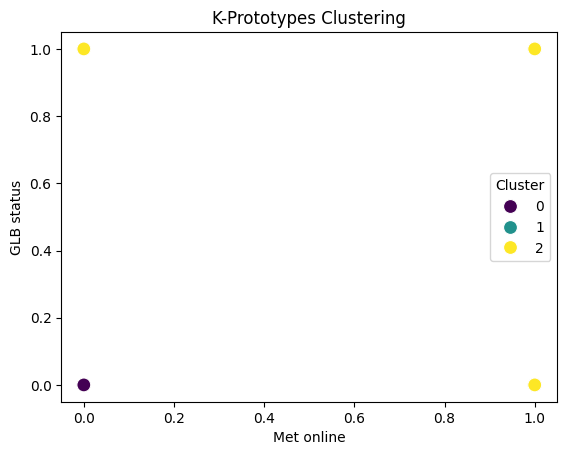

In [14]:
sns.scatterplot(x=df_features['q24_met_online'], y=df_features['glbstatus'], hue=df_features['Cluster'], palette="viridis", s=100)
plt.xlabel("Met online")
plt.ylabel("GLB status")
plt.title("K-Prototypes Clustering")
plt.show()

In [15]:
print(df_features.groupby("Cluster").mean())

         ppagecat  ppeducat  ppgender   ppincimp  children_in_hh  qflag  \
Cluster                                                                   
0        3.847964  3.141176  1.165611  12.663348        0.209050    1.0   
1        2.868778  2.816742  1.438914  12.515837        2.414027    1.0   
2        3.818313  2.744052  1.776496  11.456381        0.087960    1.0   

         glbstatus   married  q24_met_online  
Cluster                                       
0         0.282353  0.619910        0.104072  
1         0.126697  0.825792        0.065611  
2         0.225667  0.598414        0.090844  
